#### LIST OF REGRESSION ALGORITHMS IN MACHINE LEARNING

1. Linear Regression
2. Ridge Regression
3. Lasso Regression 
3. Support Vector Machines (SVM)
4. Decision Tree Regression 
5. Random Forest
6. KNN Model 


In [74]:
#Importing Libraries for ML

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

# Importing Data

df = pd.read_csv('exercise_physical_data.csv')

df1 = pd.read_csv('calories.csv')

In [75]:
df.head(3)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7


In [76]:
df1.head(3)

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0


In [77]:
print(df.shape)
print(df1.shape)

(15000, 8)
(15000, 2)


In [78]:
df = pd.concat([df, df1], axis=1)
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,User_ID,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,14733363,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,14861698,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,11179863,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,16180408,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,17771927,35.0


In [79]:
df = df.drop(["User_ID"], axis=1)

In [80]:
df["Gender"] = df["Gender"].map({"male":0, "female":1})

df.head(3)

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,0,69,179.0,79.0,5.0,88.0,38.7,26.0


In [81]:
df.isnull().sum()

Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

## Remove Outliers from Normal and Skewed data

In [82]:
def plot_distribution(df, col):
    fig, ax =plt.subplots(1,2)
    plt.figure(figsize=(40,10))
    sns.distplot(df[col], ax=ax[0])  
    df.boxplot(column=col, ax=ax[1])
    plt.show()

def find_outliers_normal(data, col):
    upper_bound = data[col].mean() + 3*data[col].std()
    lower_bound = data[col].mean() - 3*data[col].std()

    upper_outliers = len(data.loc[data[col]>upper_bound])
    lower_outliers = len(data.loc[data[col]>upper_bound])
    
    print("Upper Bound - ",upper_bound)
    print("Lower Bound - ",lower_bound)
    print("Upper Outliers - ",upper_outliers)
    print("Lower Outliers - ",lower_outliers)
    
def find_outliers_skewed(df, col):
    IQR = df[col].quantile(0.75)-df[col].quantile(0.25)
    
    upper_bound = df[col].quantile(0.75) + (IQR*1.5)
    lower_bound = df[col].quantile(0.25) - (IQR*1.5)
    
    upper_outliers = len(df.loc[df[col]>upper_bound])
    lower_outliers = len(df.loc[df[col]<lower_bound])
    
    print("Upper Bound - ",upper_bound)
    print("Lower Bound - ",lower_bound)
    print("Upper Outliers - ",upper_outliers)
    print("Lower Outliers - ",lower_outliers)


def remove_outliers_normal(df, col):
    df = df.copy(deep=True)
    upper_bound = df[col].mean() + 3*df[col].std()
    lower_bound = df[col].mean() - 3*df[col].std()
    
    df.loc[df[col]>upper_bound, col] = upper_bound-1
    df.loc[df[col]<lower_bound, col] = lower_bound+1
    
    return df

def remove_outliers_skewed(df, col):
    IQR = df[col].quantile(0.75)-df[col].quantile(0.25)
    
    upper_bridge = df[col].quantile(0.75) + (IQR*1.5)
    lower_bridge = df[col].quantile(0.25) - (IQR*1.5)
    
    df.loc[df[col]>upper_bridge, col] = upper_bridge-1
    df.loc[df[col]<lower_bridge, col] = lower_bridge+1
    
    return df

In [83]:
## Remove Outliers from "Weight" column

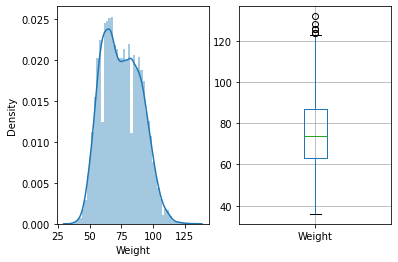

<Figure size 2880x720 with 0 Axes>

Upper Bound -  120.07383688440738
Lower Bound -  29.859896448925937
Upper Outliers -  13
Lower Outliers -  13


In [84]:
plot_distribution(df,"Weight")
find_outliers_normal(df, "Weight")

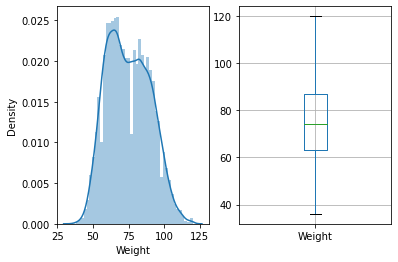

<Figure size 2880x720 with 0 Axes>

Upper Bound -  120.03039566829618
Lower Bound -  29.895065648970117
Upper Outliers -  0
Lower Outliers -  0


In [85]:
df = remove_outliers_normal(df,"Weight")

plot_distribution(df,"Weight")
find_outliers_normal(df, "Weight")

In [86]:
## Remove Outliers from "Height" column

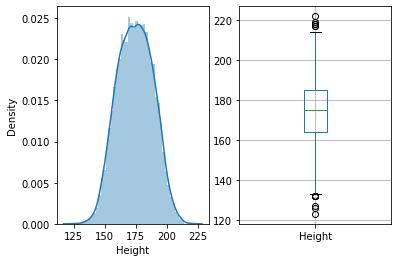

<Figure size 2880x720 with 0 Axes>

Upper Bound -  217.2394741829869
Lower Bound -  131.6907924836798
Upper Outliers -  4
Lower Outliers -  4


In [87]:
plot_distribution(df,"Height")
find_outliers_normal(df, "Height")

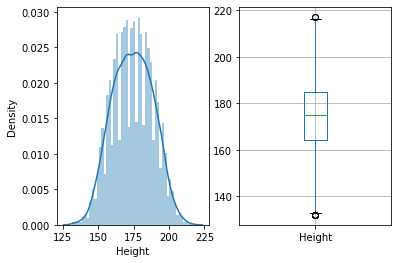

<Figure size 2880x720 with 0 Axes>

Upper Bound -  217.21861638899236
Lower Bound -  131.71298764756534
Upper Outliers -  0
Lower Outliers -  0


In [88]:
df = remove_outliers_normal(df,"Height")

plot_distribution(df,"Height")
find_outliers_normal(df, "Height")

In [89]:
## Remove Outliers from "Heart_Rate" column

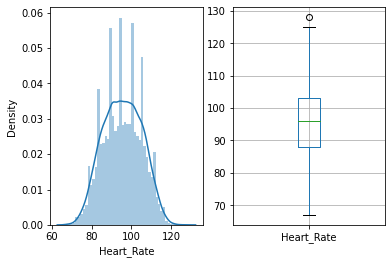

<Figure size 2880x720 with 0 Axes>

Upper Bound -  124.26851790285123
Lower Bound -  66.76854876381545
Upper Outliers -  3
Lower Outliers -  3


In [90]:
plot_distribution(df,"Heart_Rate")
find_outliers_normal(df, "Heart_Rate")

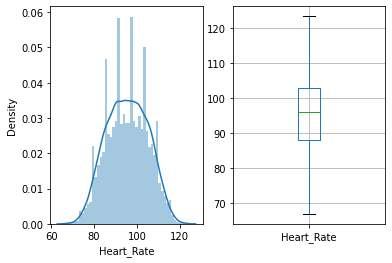

<Figure size 2880x720 with 0 Axes>

Upper Bound -  124.26292895776902
Lower Bound -  66.77304511605877
Upper Outliers -  0
Lower Outliers -  0


In [91]:
df = remove_outliers_normal(df,"Heart_Rate")

plot_distribution(df,"Heart_Rate")
find_outliers_normal(df, "Heart_Rate")

In [92]:
## Remove Outliers from "Age" column

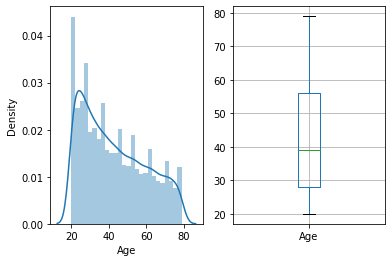

<Figure size 2880x720 with 0 Axes>

Upper Bound -  98.0
Lower Bound -  -14.0
Upper Outliers -  0
Lower Outliers -  0


In [93]:
plot_distribution(df,"Age")
find_outliers_skewed(df, "Age")

In [94]:
## Remove Outliers from "Body_Temp" column

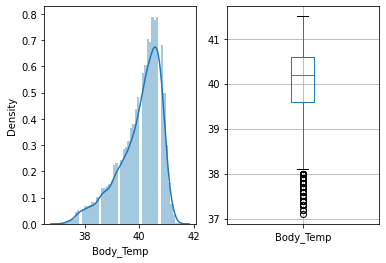

<Figure size 2880x720 with 0 Axes>

Upper Bound -  42.1
Lower Bound -  38.1
Upper Outliers -  0
Lower Outliers -  369


In [95]:
plot_distribution(df,"Body_Temp")
find_outliers_skewed(df, "Body_Temp")

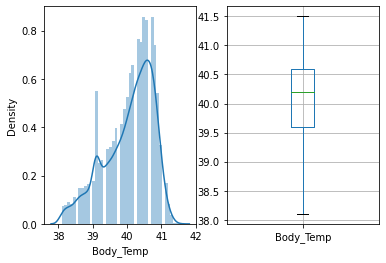

<Figure size 2880x720 with 0 Axes>

Upper Bound -  42.18503424658027
Lower Bound -  37.930579086753056
Upper Outliers -  0
Lower Outliers -  0


In [96]:
df = remove_outliers_skewed(df,"Body_Temp")

plot_distribution(df,"Body_Temp")
find_outliers_normal(df, "Body_Temp")

In [97]:
## Remove Outliers from "Duration" column

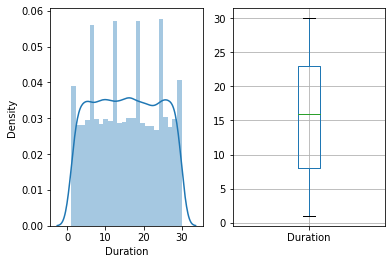

<Figure size 2880x720 with 0 Axes>

Upper Bound -  40.48821002673432
Lower Bound -  -9.427010026734322
Upper Outliers -  0
Lower Outliers -  0


In [98]:
plot_distribution(df,"Duration")
find_outliers_normal(df, "Duration")

## Feature selection

<AxesSubplot:>

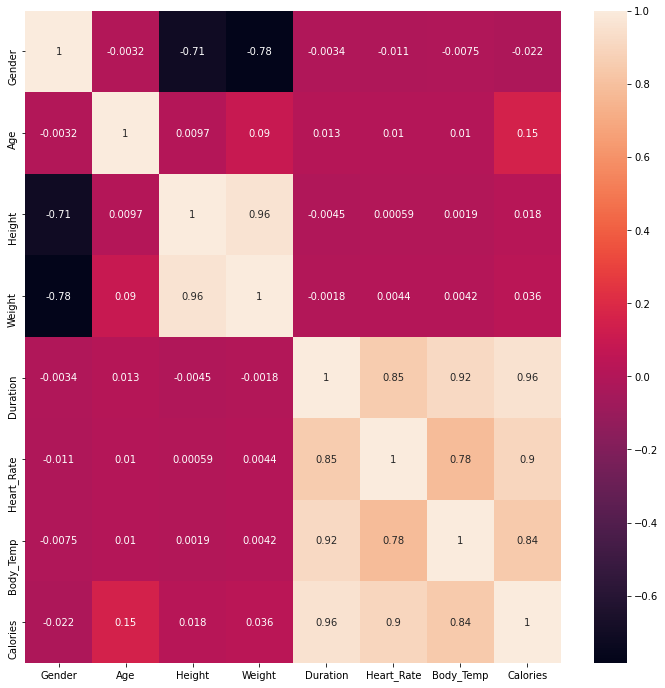

In [99]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)

In [100]:
df

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,1,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...
14995,1,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,1,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,1,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,0,78,193.0,97.0,2.0,84.0,38.3,11.0


In [101]:
x = df.iloc[:, :-1]
y = df.iloc[:,-1]

x

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,0,68,190.0,94.0,29.0,105.0,40.8
1,1,20,166.0,60.0,14.0,94.0,40.3
2,0,69,179.0,79.0,5.0,88.0,38.7
3,1,34,179.0,71.0,13.0,100.0,40.5
4,1,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...
14995,1,20,193.0,86.0,11.0,92.0,40.4
14996,1,27,165.0,65.0,6.0,85.0,39.2
14997,1,43,159.0,58.0,16.0,90.0,40.1
14998,0,78,193.0,97.0,2.0,84.0,38.3


In [102]:
y

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64

In [103]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

select_feature = SelectKBest(score_func = chi2, k="all")

features = select_feature.fit(x, y)

features_df = pd.DataFrame(x.columns, columns=["Features"])
scores_df = pd.DataFrame(features.scores_, columns=["Scores"])

feature_scores_df = pd.concat([features_df, scores_df], axis=1)

feature_scores_df.sort_values(by="Scores", ascending=False)

,Features,Scores
4,Duration,63736.882215
5,Heart_Rate,11985.717939
1,Age,6213.761331
3,Weight,1775.848702
2,Height,574.066635
0,Gender,272.090135
6,Body_Temp,163.723078


#### As Body_Temp is correlated to Duration and also it has very low score in SelectKBest hence we dont need this column, so we drop it. 

In [104]:
df.drop(["Body_Temp"], axis=True, inplace=True)

# Split Data 

### Split data to Features and Target

In [105]:
x = df.iloc[:,:-1]
y = df.iloc[:, -1]

x

,Gender,Age,Height,Weight,Duration,Heart_Rate
0,0,68,190.0,94.0,29.0,105.0
1,1,20,166.0,60.0,14.0,94.0
2,0,69,179.0,79.0,5.0,88.0
3,1,34,179.0,71.0,13.0,100.0
4,1,27,154.0,58.0,10.0,81.0
...,...,...,...,...,...,...
14995,1,20,193.0,86.0,11.0,92.0
14996,1,27,165.0,65.0,6.0,85.0
14997,1,43,159.0,58.0,16.0,90.0
14998,0,78,193.0,97.0,2.0,84.0


In [106]:
y

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64

### Split Data to Train and Test 

In [107]:
x_train, x_test, y_train , y_test = train_test_split(x,y, random_state=0)

# Linear Regression

Linear Regression assumes the following model:

y = Xβ+c+ϵ 

X data

β  coefficients

c intercept

ϵ  error, cannot explained by model

y target

LinearRegression(
    **fit_intercept**=True,
    **normalize**=False,
    **copy_X**=True,
    **n_jobs**=None,
    **positive**=False,
)

LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
to minimize the residual sum of squares between the observed targets in
the dataset, and the targets predicted by the linear approximation.

Parameters
----------
**fit_intercept** : bool, default=True
    Whether to calculate the intercept for this model. If set
    to False, no intercept will be used in calculations
    (i.e. data is expected to be centered).

**normalize** : bool, default=False
    This parameter is ignored when ``fit_intercept`` is set to False.
    If True, the regressors X will be normalized before regression by
    subtracting the mean and dividing by the l2-norm.
    If you wish to standardize, please use
    :class:`~sklearn.preprocessing.StandardScaler` before calling ``fit``
    on an estimator with ``normalize=False``.

**copy_X** : bool, default=True
    If True, X will be copied; else, it may be overwritten.

**n_jobs** : int, default=None
    The number of jobs to use for the computation. This will only provide
    speedup for n_targets > 1 and sufficient large problems.
    ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
    ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
    for more details.

**positive** : bool, default=False
    When set to ``True``, forces the coefficients to be positive. This
    option is only supported for dense arrays.


Attributes
----------
**coef_** : array of shape (n_features, ) or (n_targets, n_features)
    Estimated coefficients for the linear regression problem.
    If multiple targets are passed during the fit (y 2D), this
    is a 2D array of shape (n_targets, n_features), while if only
    one target is passed, this is a 1D array of length n_features.

**rank_** : int
    Rank of matrix `X`. Only available when `X` is dense.

**singular_** : array of shape (min(X, y),)
    Singular values of `X`. Only available when `X` is dense.

**intercept_** : float or array of shape (n_targets,)
    Independent term in the linear model. Set to 0.0 if
    `fit_intercept = False`.

In [110]:
model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [111]:
model.score(x_test, y_test)

0.9606490806950447

In [124]:
y_pred = model.predict(x_test)

array([ 43.55687681,   5.56020058, 114.97107517, ...,  94.71907578,
       167.92715009,  20.15578476])